In [131]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

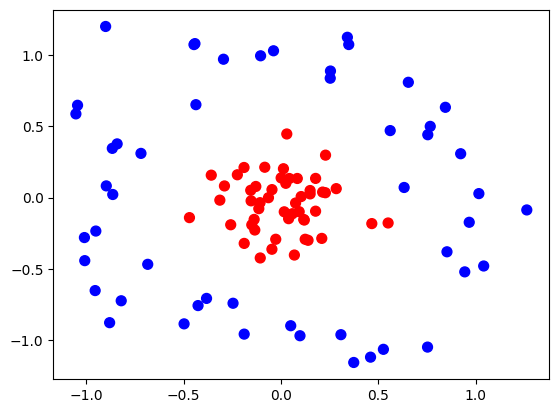

In [132]:
# Generating a synthetic circular dataset
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.15, noise=.15)  # 100 samples, with specified factor and noise
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')  # Plotting the dataset

In [133]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [134]:
# Creating a linear kernel SVM classifier and training it
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [135]:
# Calculating the accuracy of the linear SVM classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [136]:
# Function to plot decision boundary for a given classifier
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    # Setting up the mesh grid for contour plot
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    # Plotting the decision boundary
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plotting the data points
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-136-089d45a3b936>:23: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



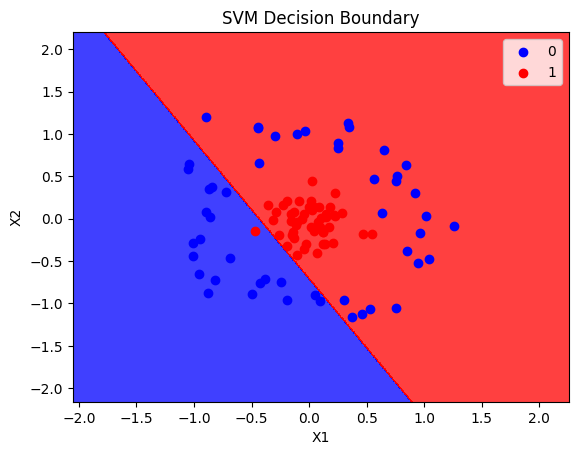

In [137]:
# Plotting the decision boundary for linear SVM
plot_decision_boundary(X, y, classifier)

In [138]:
# Creating and training a polynomial kernel SVM classifier with degree 4
poly_classifier = SVC(kernel="poly",degree=4)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [139]:
# Calculating the accuracy of the polynomial SVM classifier
accuracy_score(y_test, y_pred)

0.95

<ipython-input-136-089d45a3b936>:23: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



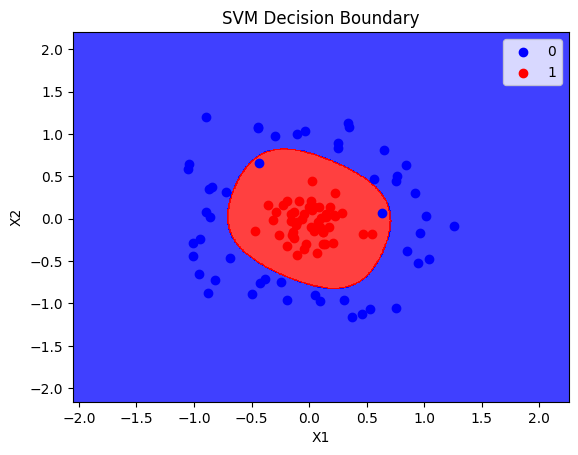

In [140]:
# Plotting the decision boundary for polynomial SVM with degree 4
plot_decision_boundary(X, y, poly_classifier)

In [141]:
# Repeating the process for polynomial SVM with degree 7
poly_classifier = SVC(kernel="poly",degree=7)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [142]:
# Calculating and displaying accuracy
accuracy_score(y_test, y_pred)

0.55

<ipython-input-136-089d45a3b936>:23: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



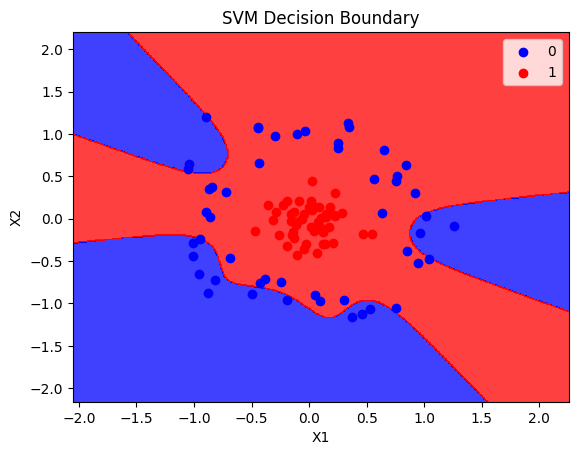

In [143]:
# Plotting decision boundary for polynomial SVM with degree 7
plot_decision_boundary(X, y, poly_classifier)

In [144]:
# Creating a DataFrame from the dataset for analysis of polynomial components
import pandas as pd
df = pd.DataFrame(np.vstack([X[:, 0],X[:, 1]]).T, columns=['X1','X2'])
df['Y'] = y
df.head(5)

,X1,X2,Y
0,-0.189711,0.211550,1
1,-0.046361,0.055962,1
2,-0.107590,-0.035900,1
3,-0.137852,-0.153487,1
4,0.123964,-0.293050,1


In [145]:
# Adding polynomial features to the DataFrame
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,-0.189711,0.211550,1,0.035990,0.044753,-0.040133
1,-0.046361,0.055962,1,0.002149,0.003132,-0.002594
2,-0.107590,-0.035900,1,0.011576,0.001289,0.003863
3,-0.137852,-0.153487,1,0.019003,0.023558,0.021158
4,0.123964,-0.293050,1,0.015367,0.085878,-0.036328


In [146]:
# Visualizing the data in 3D using Plotly
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [147]:
# Visualizing another 3D scatter plot with different features
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
fig.show()

In [148]:
# Function to plot a 3D scatter plot with an exponential transformation
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

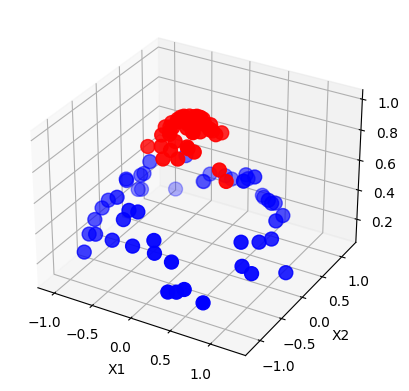

In [149]:
# Plotting the 3D scatter plot
plot_3d_plot(X, y)


In [150]:
# Creating and training a radial basis function (RBF) kernel SVM classifier
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [151]:
# Calculating the accuracy of the RBF SVM classifier
accuracy_score(y_test, y_pred)

1.0

<ipython-input-136-089d45a3b936>:23: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



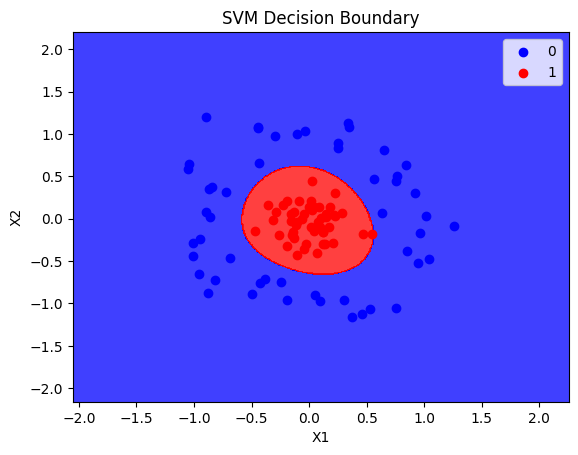

In [152]:
# Plotting the decision boundary for RBF SVM
plot_decision_boundary(X, y, rbf_classifier)